In [1]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
pl.Config.set_tbl_rows(50)   # or 100

polars.config.Config

### what data do we actually have downloaded?

In [2]:
DATA_DIR = Path("..") / "data"

print("Folders:", [p.name for p in DATA_DIR.iterdir() if p.is_dir()])
for folder in DATA_DIR.iterdir():
    if folder.is_dir():
        print(f"\n{folder.name}:")
        for f in folder.glob("*.parquet"):
            print(" ", f.name)

Folders: ['Polymarket', 'Statsbomb']

Polymarket:
  soccer_markets.parquet
  soccer_odds_history.parquet
  soccer_trades.parquet
  soccer_tokens.parquet
  soccer_summary.parquet
  soccer_event_stats.parquet

Statsbomb:
  reference.parquet
  three_sixty.parquet
  events.parquet
  matches.parquet
  lineups.parquet


### explore matches data

In [3]:
matches = pl.read_parquet(DATA_DIR / "Statsbomb" / "matches.parquet")

In [4]:
matches.head()

match_id,match_date,match_week,match_status,match_status_360,kickoff,home_score,away_score,competition_id,competition,competition_stage,season_id,season,home_team_id,home_team,home_managers,away_team_id,away_team,away_managers,stadium_id,stadium,referee_id,referee,last_updated,last_updated_360,data_version,shot_fidelity_version,xy_fidelity_version,competition_name,gender,is_youth,is_international,country_name,season_name,match_updated,match_available_360
i32,str,i32,str,str,str,i32,i32,i32,str,str,i32,str,i32,str,str,i32,str,str,i32,str,i32,str,str,str,str,str,str,str,str,bool,bool,str,str,str,str
9880,"""2018-04-14""",32,"""available""","""scheduled""","""16:15:00""",2,1,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",207,"""Valencia""","""[{""id"":211,""name"":""Marcelino G…",342,"""Spotify Camp Nou""",2728,"""Carlos del Cerro Grande""","""2023-02-08T17:23:53.901920""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null
9912,"""2018-04-29""",35,"""available""","""scheduled""","""20:45:00""",2,4,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",219,"""RC Deportivo La Coruña""","""[{""id"":371,""name"":""Clarence Se…",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",4658,"""Estadio Abanca-Riazor""",2602,"""Ricardo De Burgos Bengoetxea""","""2022-12-05T14:42:44.641092""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null
9924,"""2018-05-06""",36,"""available""","""scheduled""","""20:45:00""",2,2,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",220,"""Real Madrid""","""[{""id"":56,""name"":""Zinédine Zid…",342,"""Spotify Camp Nou""",2608,"""Alejandro José Hernández Herná…","""2022-12-01T03:25:12.063586""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null
9855,"""2018-03-18""",29,"""available""","""scheduled""","""16:15:00""",2,0,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",215,"""Athletic Club""","""[{""id"":210,""name"":""José Ángel …",342,"""Spotify Camp Nou""",2575,"""Santiago Jaime Latre""","""2022-12-01T02:33:31.178193""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null
9827,"""2018-03-01""",26,"""available""","""scheduled""","""21:00:00""",1,1,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",208,"""Las Palmas""","""[{""id"":220,""name"":""Francisco J…",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",357,"""Estadio de Gran Canaria""",180,"""Antonio Miguel Mateu Lahoz""","""2022-08-04T17:18:06.540844""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null


In [5]:
matches.shape

(3464, 36)

In [6]:
matches.null_count()

match_id,match_date,match_week,match_status,match_status_360,kickoff,home_score,away_score,competition_id,competition,competition_stage,season_id,season,home_team_id,home_team,home_managers,away_team_id,away_team,away_managers,stadium_id,stadium,referee_id,referee,last_updated,last_updated_360,data_version,shot_fidelity_version,xy_fidelity_version,competition_name,gender,is_youth,is_international,country_name,season_name,match_updated,match_available_360
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,85,0,0,84,10,10,200,200,0,1636,4,200,246,0,0,0,0,0,0,0,3039


In [7]:
matches.filter(pl.col("match_id") == 9880)

match_id,match_date,match_week,match_status,match_status_360,kickoff,home_score,away_score,competition_id,competition,competition_stage,season_id,season,home_team_id,home_team,home_managers,away_team_id,away_team,away_managers,stadium_id,stadium,referee_id,referee,last_updated,last_updated_360,data_version,shot_fidelity_version,xy_fidelity_version,competition_name,gender,is_youth,is_international,country_name,season_name,match_updated,match_available_360
i32,str,i32,str,str,str,i32,i32,i32,str,str,i32,str,i32,str,str,i32,str,str,i32,str,i32,str,str,str,str,str,str,str,str,bool,bool,str,str,str,str
9880,"""2018-04-14""",32,"""available""","""scheduled""","""16:15:00""",2,1,11,"""La Liga""","""Regular Season""",1,"""2017/2018""",217,"""Barcelona""","""[{""id"":227,""name"":""Ernesto Val…",207,"""Valencia""","""[{""id"":211,""name"":""Marcelino G…",342,"""Spotify Camp Nou""",2728,"""Carlos del Cerro Grande""","""2023-02-08T17:23:53.901920""","""2021-06-13T16:17:31.694""","""1.1.0""","""2""","""2""","""La Liga""","""male""",false,false,"""Spain""","""2017/2018""","""2025-07-14T10:01:16.674864""",null


In [8]:
matches["competition_name"].value_counts().sort('count', descending=True)

competition_name,count
str,u32
"""La Liga""",868
"""Ligue 1""",435
"""Premier League""",418
"""Serie A""",381
"""1. Bundesliga""",340
"""FA Women's Super League""",326
"""FIFA World Cup""",147
"""Women's World Cup""",116
"""Indian Super league""",115


In [9]:
matches["season_name"].value_counts().sort("count", descending=True)

season_name,count
str,u32
"""2015/2016""",1824
"""2020/2021""",166
"""2018/2019""",143
"""2021/2022""",141
"""2023""",122
"""2019/2020""",120
"""2018""",100
"""2022""",95
"""2024""",83


### explore events data

In [10]:
events = pl.read_parquet(DATA_DIR / "Statsbomb" / "events.parquet")

In [11]:
events.shape

(12188949, 112)

In [12]:
events.schema

Schema([('id', String),
        ('index_num', Int32),
        ('period', Int32),
        ('minute', Int32),
        ('second', Int32),
        ('timestamp', String),
        ('duration', Float32),
        ('location_x', Float32),
        ('location_y', Float32),
        ('possession', Int32),
        ('possession_team_id', Int32),
        ('possession_team', String),
        ('out', Boolean),
        ('off_camera', Boolean),
        ('counterpress', Boolean),
        ('under_pressure', Boolean),
        ('type_id', Int32),
        ('type', String),
        ('match_id', Int32),
        ('team_id', Int32),
        ('team', String),
        ('player_id', Int32),
        ('player', String),
        ('position_id', Int32),
        ('position', String),
        ('play_pattern_id', Int32),
        ('play_pattern', String),
        ('shot_end_location_x', Float32),
        ('shot_end_location_y', Float32),
        ('shot_end_location_z', Float32),
        ('shot_statsbomb_xg', Float32),
      

In [13]:
events["type"].value_counts().sort("count", descending=True).head(15)

type,count
str,u32
"""Pass""",3387760
"""Ball Receipt*""",3167310
"""Carry""",2632570
"""Pressure""",1113859
"""Ball Recovery""",366673
"""Duel""",257861
"""Clearance""",158993
"""Block""",132352
"""Dribble""",122047


In [14]:
events['match_id'].n_unique()

3464

In [15]:
events['type'].n_unique()

35

In [16]:
events['play_pattern'].value_counts().sort("count", descending=True)

play_pattern,count
str,u32
"""Regular Play""",5401529
"""From Throw In""",2862886
"""From Free Kick""",1772698
"""From Goal Kick""",886785
"""From Corner""",433609
"""From Kick Off""",365851
"""From Keeper""",319809
"""From Counter""",111347
"""Other""",34435


In [17]:
shots = events.filter(pl.col("type") == "Shot")
shots.shape

(88023, 112)

In [18]:
shots["shot_statsbomb_xg"].is_not_null().mean() # what fraction of shot events has an xG component

1.0

In [19]:
shots["shot_statsbomb_xg"].describe()

statistic,value
str,f64
"""count""",88023.0
"""null_count""",0.0
"""mean""",0.106599
"""std""",0.149922
"""min""",0.00018
"""25%""",0.027747
"""50%""",0.054884
"""75%""",0.110168
"""max""",0.995122


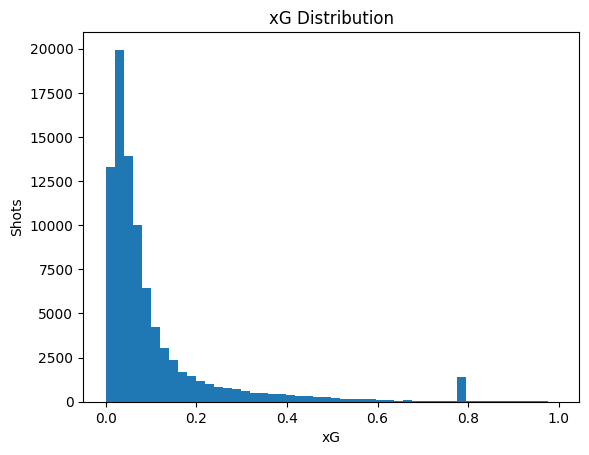

In [20]:
plt.hist(shots["shot_statsbomb_xg"].to_numpy(), bins=50)
plt.xlabel("xG")
plt.ylabel("Shots")
plt.title("xG Distribution")
plt.show()

In [21]:
# so, there are about 88k shot events in the data, the median is very low quality show 0.05. most shots are low quality, 
# thus the low xG, like blocked shots, etc. then you have the spike around 0.8, which is probably penalties and that has to 
# be modeled separately from normal shots.

In [22]:
shots.select((pl.col("shot_statsbomb_xg") > 0.3).mean().alias("pct_big_chances"))
#so only about 8 percent of the shots are "big chances" if we categorize big changes as xG > 0.3.

pct_big_chances
f64
0.081217


In [23]:
one_match_events = events.filter(pl.col("match_id") == 9880)
one_match_events.shape

(3947, 112)

In [24]:
one_match_events.select([
    "minute", 
    "second", 
    "duration",
    "type", 
    "team", 
    "player",
    "location_x",
    "location_y",
    "possession",
    "under_pressure",
    "play_pattern"
]).head(20)

minute,second,duration,type,team,player,location_x,location_y,possession,under_pressure,play_pattern
i32,i32,f32,str,str,str,f32,f32,i32,bool,str
0,0,0.0,"""Starting XI""","""Barcelona""",null,null,null,1,false,"""Regular Play"""
0,0,0.0,"""Starting XI""","""Valencia""",null,null,null,1,false,"""Regular Play"""
0,0,0.0,"""Half Start""","""Barcelona""",null,null,null,1,false,"""Regular Play"""
0,0,0.0,"""Half Start""","""Valencia""",null,null,null,1,false,"""Regular Play"""
0,0,0.925053,"""Pass""","""Valencia""","""Santiago Mina Lorenzo""",61.0,40.099998,2,false,"""From Kick Off"""
0,1,null,"""Ball Receipt*""","""Valencia""","""Daniel Parejo Muñoz""",48.299999,43.599998,2,false,"""From Kick Off"""
0,1,1.342956,"""Carry""","""Valencia""","""Daniel Parejo Muñoz""",48.299999,43.599998,2,false,"""From Kick Off"""
0,2,1.498024,"""Pass""","""Valencia""","""Daniel Parejo Muñoz""",48.299999,47.200001,2,false,"""From Kick Off"""
0,4,null,"""Ball Receipt*""","""Valencia""","""Carlos Soler Barragán""",58.400002,77.0,2,false,"""From Kick Off"""


In [25]:
one_match_events.filter(pl.col("type") == "Shot").select(["minute", "second", "team", "player", "shot_statsbomb_xg", "shot_outcome"])

minute,second,team,player,shot_statsbomb_xg,shot_outcome
i32,i32,str,str,f32,str
3,31,"""Valencia""","""Gonçalo Manuel Ganchinho Guede…",0.008752,"""Saved"""
7,2,"""Valencia""","""Santiago Mina Lorenzo""",0.053915,"""Blocked"""
13,21,"""Barcelona""","""Jordi Alba Ramos""",0.080842,"""Saved"""
14,7,"""Barcelona""","""Luis Alberto Suárez Díaz""",0.456472,"""Goal"""
17,27,"""Valencia""","""Gonçalo Manuel Ganchinho Guede…",0.025283,"""Saved"""
19,48,"""Valencia""","""Gonçalo Manuel Ganchinho Guede…",0.087698,"""Blocked"""
22,1,"""Valencia""","""Rúben Miguel Nunes Vezo""",0.006432,"""Blocked"""
22,39,"""Valencia""","""Gonçalo Manuel Ganchinho Guede…",0.017197,"""Off T"""
23,10,"""Valencia""","""Rodrigo Moreno Machado""",0.197594,"""Saved to Post"""


In [26]:
# interesting to see that some goals have very low xG.. it may be interesting to see what teams lead this statistic, 
# like what teams have the most low xG goals or like the lowest mean xG for goals scored

In [27]:
goals = shots.filter(pl.col("shot_outcome") == "Goal")

In [28]:
goals.select("shot_statsbomb_xg").describe()

statistic,shot_statsbomb_xg
str,f64
"""count""",9790.0
"""null_count""",0.0
"""mean""",0.309409
"""std""",0.266995
"""min""",0.00018
"""25%""",0.089535
"""50%""",0.210206
"""75%""",0.472767
"""max""",0.995122


In [29]:
goals_by_team = (
    goals
    .group_by("team")
    .agg([
        pl.count().alias("goals"),
        pl.mean("shot_statsbomb_xg").alias("mean_goal_xg")
    ])
    .filter(pl.col("goals") >= 20)
    .sort("mean_goal_xg")
)

goals_by_team.head(10)

/var/folders/yx/tm8t_myd1732fl671q4fcrlh0000gn/T/ipykernel_29565/599507557.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("goals"),


team,goals,mean_goal_xg
str,u32,f32
"""Birmingham City WFC""",44,0.203914
"""Empoli""",39,0.206579
"""West Ham United LFC""",62,0.216811
"""Gazélec Ajaccio""",34,0.218931
"""AFC Bournemouth""",43,0.227785
"""West Ham United""",64,0.231962
"""Odisha""",30,0.234909
"""Aston Villa""",39,0.235366
"""Netherlands Women's""",34,0.239877


In [30]:
goals.group_by("team").agg([
    pl.count().alias("goals"),
    pl.mean("shot_statsbomb_xg").alias("mean_goal_xg"),
    pl.median("shot_statsbomb_xg").alias("median_goal_xg")
]).filter(pl.col("goals") >= 20).sort("mean_goal_xg").head(5)

/var/folders/yx/tm8t_myd1732fl671q4fcrlh0000gn/T/ipykernel_29565/76632068.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("goals"),


team,goals,mean_goal_xg,median_goal_xg
str,u32,f32,f32
"""Birmingham City WFC""",44,0.203914,0.176974
"""Empoli""",39,0.206579,0.159605
"""West Ham United LFC""",62,0.216811,0.152758
"""Gazélec Ajaccio""",34,0.218931,0.13381
"""AFC Bournemouth""",43,0.227785,0.134529


In [31]:
# let's compare against the high xG scoring teams

In [32]:
goals.group_by("team").agg([
    pl.count().alias("goals"),
    pl.median("shot_statsbomb_xg").alias("median_goal_xg")
]).filter(pl.col("goals") >= 20).sort("median_goal_xg", descending=True).head(5)

/var/folders/yx/tm8t_myd1732fl671q4fcrlh0000gn/T/ipykernel_29565/3074771110.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("goals"),


team,goals,median_goal_xg
str,u32,f32
"""Australia Women's""",26,0.627678
"""Portugal""",34,0.549346
"""France""",49,0.383531
"""Argentina""",50,0.38004
"""England""",55,0.353012


In [33]:
#xG distribution is right-skewed
#Only ~8% of shots are big chances
#Some teams score from low-xG shots
#Others rely on high-quality chances
#Mean vs median confirms stability

### let's look at lineups

In [34]:
lineups = pl.read_parquet(DATA_DIR / "Statsbomb" / "lineups.parquet")
lineups.shape

(165820, 17)

In [35]:
lineups.schema

Schema([('match_id', Int32),
        ('team_id', Int32),
        ('player_id', Int32),
        ('player_name', String),
        ('player_nickname', String),
        ('jersey_number', Int32),
        ('country_id', Int32),
        ('country_name', String),
        ('team_name', String),
        ('position_name', String),
        ('from_time', String),
        ('to_time', String),
        ('from_period', Int32),
        ('to_period', Int32),
        ('card_time', String),
        ('card_type', String),
        ('card_reason', String)])

In [36]:
# how many players appear per match
lineups.group_by("match_id").agg(
    pl.count().alias("players")
).select("players").describe()

/var/folders/yx/tm8t_myd1732fl671q4fcrlh0000gn/T/ipykernel_29565/2984372970.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("players")


statistic,players
str,f64
"""count""",3464.0
"""null_count""",0.0
"""mean""",47.869515
"""std""",10.165949
"""min""",24.0
"""25%""",40.0
"""50%""",47.0
"""75%""",54.0
"""max""",119.0


In [37]:
# looking at a specific match
one_match_lineup = lineups.filter(pl.col("match_id") == 9880)
one_match_lineup.shape

(39, 17)

In [38]:
one_match_lineup.head(5)

match_id,team_id,player_id,player_name,player_nickname,jersey_number,country_id,country_name,team_name,position_name,from_time,to_time,from_period,to_period,card_time,card_type,card_reason
i32,i32,i32,str,str,i32,i32,str,str,str,str,str,i32,i32,str,str,str
9880,217,5213,"""Gerard Piqué Bernabéu""","""Gerard Piqué""",3,214,"""Spain""","""Barcelona""","""Right Center Back""","""00:00""",null,1,null,"""06:18""","""Yellow Card""","""Foul Committed"""
9880,217,5477,"""Ousmane Dembélé""",null,11,78,"""France""","""Barcelona""","""Right Midfield""","""78:15""",null,2,null,"""85:09""","""Yellow Card""","""Foul Committed"""
9880,207,6589,"""Geoffrey Kondogbia""",null,16,43,"""Central African Republic""","""Valencia""","""Left Defensive Midfield""","""00:00""",null,1,null,"""11:10""","""Yellow Card""","""Foul Committed"""
9880,207,6746,"""Gabriel Armando de Abreu""","""Gabriel Paulista""",5,31,"""Brazil""","""Valencia""","""Left Center Back""","""00:00""","""39:41""",1,1,"""74:29""","""Yellow Card""","""Foul Committed"""
9880,207,6746,"""Gabriel Armando de Abreu""","""Gabriel Paulista""",5,31,"""Brazil""","""Valencia""","""Left Center Back""","""39:44""",null,1,null,"""74:29""","""Yellow Card""","""Foul Committed"""


In [39]:
# Rows = player-position-time segments, look at gabriel...

In [40]:
#correct way to count players per match
one_match_lineup.group_by("match_id").agg(
    pl.col("player_id").n_unique()
)

match_id,player_id
i32,u32
9880,36


### look at 360 data

In [41]:
three_sixty = pl.read_parquet(DATA_DIR / "Statsbomb" / "three_sixty.parquet")
three_sixty.shape

(15584040, 9)

In [42]:
three_sixty.select(
    pl.col("event_uuid").n_unique(),
    pl.col("match_id").n_unique()
)
# there are only 323 matches covered, i'm not sure if that's enough

event_uuid,match_id
u32,u32
1027908,323


In [43]:
one_match_360 = three_sixty.filter(pl.col("match_id") == 9880)
one_match_360.shape
# okay, so they don't have this specific one

(0, 9)

In [44]:
shot_ids = (
    events
    .filter(pl.col("type") == "Shot")
    .select("id")
)

three_sixty_ids = three_sixty.select("event_uuid")

shot_ids_with_360 = shot_ids.join(
    three_sixty_ids,
    left_on="id",
    right_on="event_uuid",
    how="inner"
)

event_id = shot_ids_with_360[0, "id"]
event_id

'33221875-66e0-460b-a65b-8fbd14472a69'

In [45]:
frame = three_sixty.filter(pl.col("event_uuid") == event_id)
frame["actor"].value_counts()

actor,count
bool,u32
true,1
false,13


In [46]:
frame["teammate"].value_counts()

teammate,count
bool,u32
true,5
false,9


In [47]:
frame["keeper"].value_counts()

keeper,count
bool,u32
true,1
false,13


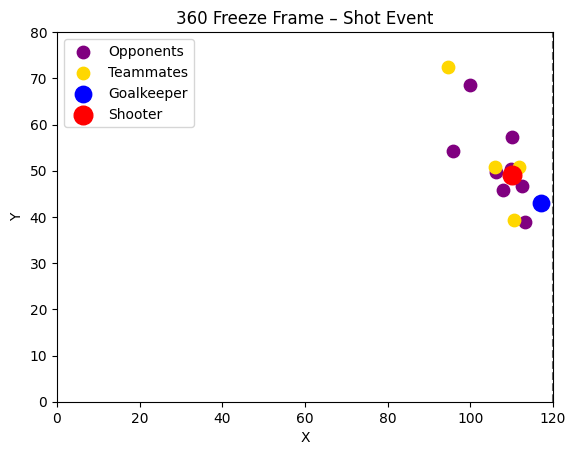

In [48]:
# Opponents (non-teammate, non-keeper)
opp = frame.filter((pl.col("teammate") == False) & (pl.col("keeper") == False))
plt.scatter(opp["location_x"], opp["location_y"], c="purple", s=80, label="Opponents")

# Teammates
tm = frame.filter(pl.col("teammate") == True)
plt.scatter(tm["location_x"], tm["location_y"], c="gold", s=80, label="Teammates")

# Goalkeeper
gk = frame.filter(pl.col("keeper") == True)
plt.scatter(gk["location_x"], gk["location_y"], c="blue", s=140, label="Goalkeeper")

# Shooter (actor)
actor = frame.filter(pl.col("actor") == True)
plt.scatter(actor["location_x"], actor["location_y"], c="red", s=180, label="Shooter")

# Goal line
plt.axvline(120, linestyle="--", color="black", alpha=0.6)

plt.xlim(0, 120)
plt.ylim(0, 80)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("360 Freeze Frame – Shot Event")
plt.legend()
plt.show()

### reference data

In [49]:
reference = pl.read_parquet(DATA_DIR / "Statsbomb" / "reference.parquet")
reference.shape

(9566, 4)

In [50]:
reference.head(3)

table_name,id,name,extra_info
str,i32,str,str
"""team""",2021,"""Jamshedpur""","""male"""
"""team""",7285,"""NorthEast United""","""male"""
"""team""",865,"""England Women's""","""female"""


In [51]:
reference["table_name"].value_counts().sort("count", descending=True)

table_name,count
str,u32
"""player""",9043
"""team""",312
"""country""",141
"""event_type""",35
"""position""",26
"""play_pattern""",9
